In [1]:
from fastai2.vision.all import * 


In [2]:
path = untar_data(URLs.IMAGENETTE_160)
path.ls()

(#2) [Path('/home/heye0507/.fastai/data/imagenette2-160/train'),Path('/home/heye0507/.fastai/data/imagenette2-160/val')]

In [3]:
fnames = get_image_files(path)
len(fnames)

13394

In [4]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [5]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [8]:
fnames[0]

Path('/home/heye0507/.fastai/data/imagenette2-160/train/n02102040/ILSVRC2012_val_00016768.JPEG')

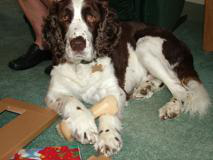

In [10]:
PILImage.create(fnames[0])

In [12]:
lbl_dict[parent_label(fnames[0])]

'English springer'

In [15]:
len(lbl_dict.values())

10

In [18]:
c = Categorize(vocab=lbl_dict.values())

In [23]:
lbl_dict.__getitem__('n02102040')

'English springer'

In [30]:
tfm = Pipeline([parent_label, lbl_dict.__getitem__,Categorize(vocab=lbl_dict.values())])

In [31]:
tfm(fnames[0])

TensorCategory(0)

In [34]:
splits = GrandparentSplitter(valid_name='val')(fnames)
len(splits)

2

In [36]:
dsets = Datasets(fnames,[[PILImage.create],[parent_label,lbl_dict.__getitem__,Categorize]],splits=splits)

In [37]:
dsets[0]

(PILImage mode=RGB size=213x160, TensorCategory(0))

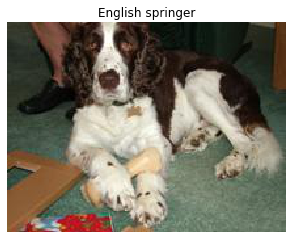

In [38]:
dsets.show(dsets[0])

In [40]:
item_tfms = [ToTensor,RandomResizedCrop(128,min_scale=0.35)]

In [42]:
batch_tfms = [IntToFloatTensor, Normalize.from_stats(*imagenet_stats)]

In [43]:
dls = dsets.dataloaders(bs=64,after_item=item_tfms,after_batch=batch_tfms)

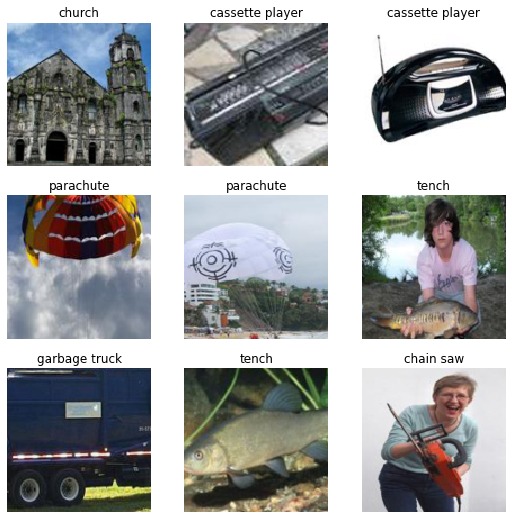

In [44]:
dls.show_batch()